# Projeto 3 - Ciência dos Dados

## Pedro de la Peña e Luigi Noronha - Segundo Semestre 2016

## Introdução

Para nosso projeto, escolhemos como a variável definida pelo professor a <b>Taxa de desemprego</b>.

### Lendo os Dados

In [39]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Luigi\Desktop\Ciência dos Dados\PNAD\CD\CD


In [40]:
dados = pd.read_excel('Main.xlsx',index_col=0)

In [41]:
dados.head()

,TaxadeDesemprego,IDH,FertilidadeTotal,Investimento,ConsumoDeAlcool
Países,,,,,
Australia,0.7,0.922,1.92,28.367409,10.21
Austria,1.2,0.870,1.38,23.132400,12.40
Belgium,3.8,0.880,1.80,22.877777,10.41
Canada,0.4,0.900,1.66,23.239707,10.20
Czech Rep.,2.8,0.861,1.39,27.014222,16.47


In [42]:
dados.shape

(30, 5)

## Escolhendo as variáveis

As variáveis escolhidas utilizando o site http://www.gapminder.org/tools. As variáveis foram: Consumo de Álcool, Investimento, Filhos por Mulher e IDH. O link com os gráficos que justificam a escolha dessas variáveis está disposto a seguir.

http://imgur.com/a/GvtlP

## Gráficos no python

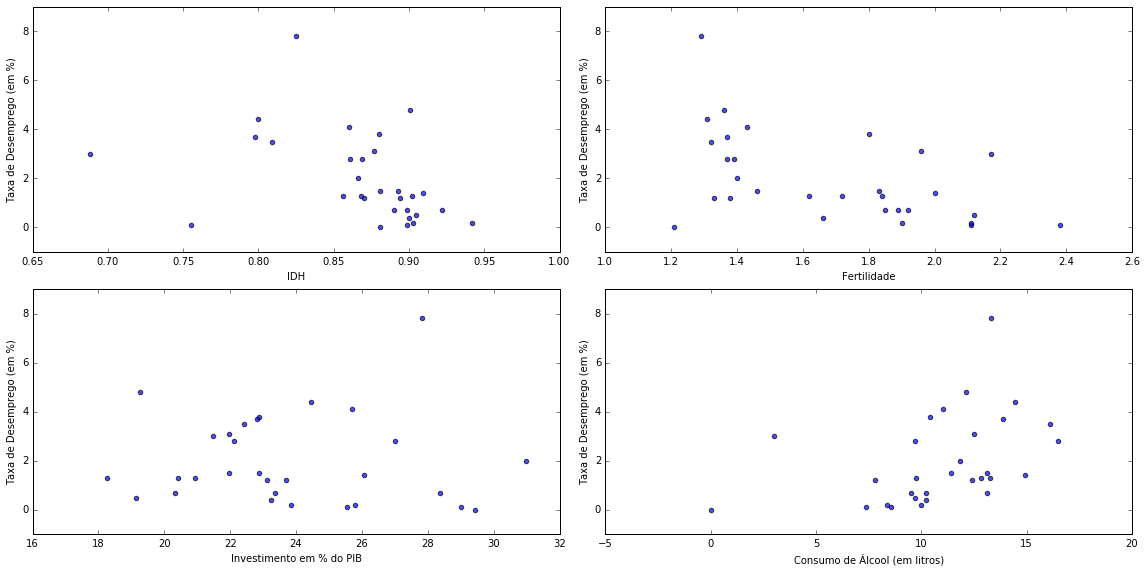

In [43]:
f, ax = plt.subplots(2,2,figsize=(16,8))
ax[0,0].scatter(dados.IDH, dados.TaxadeDesemprego, alpha=0.7)  # Plot the raw data
ax[0,0].set_xlabel("IDH")
ax[0,0].set_ylabel("Taxa de Desemprego (em %)")

ax[0,1].scatter(dados.FertilidadeTotal, dados.TaxadeDesemprego, alpha=0.7)  # Plot the raw data
ax[0,1].set_xlabel("Fertilidade")
ax[0,1].set_ylabel("Taxa de Desemprego (em %)")
#ax[0,1].set_xlim(0,10000)

ax[1,0].scatter(dados.Investimento, dados.TaxadeDesemprego, alpha=0.7)  # Plot the raw data
ax[1,0].set_xlabel("Investimento em % do PIB")
ax[1,0].set_ylabel("Taxa de Desemprego (em %)")
#ax[1,0].set_xlim(0,35)

ax[1,1].scatter(dados.ConsumoDeAlcool, dados.TaxadeDesemprego, alpha=0.7)  # Plot the raw data
ax[1,1].set_xlabel("Consumo de Álcool (em litros)")
ax[1,1].set_ylabel("Taxa de Desemprego (em %)")
#ax[1,1].set_xlim(0,100)

plt.tight_layout(1)

## Correlação por python

In [44]:
dados.corr(method='pearson')

,TaxadeDesemprego,IDH,FertilidadeTotal,Investimento,ConsumoDeAlcool
TaxadeDesemprego,1.000000,-0.395345,-0.501530,-0.027148,0.399439
IDH,-0.395345,1.000000,-0.015749,0.046136,0.060279
FertilidadeTotal,-0.501530,-0.015749,1.000000,-0.140356,-0.231785
Investimento,-0.027148,0.046136,-0.140356,1.000000,-0.161914
ConsumoDeAlcool,0.399439,0.060279,-0.231785,-0.161914,1.000000


## Entrega 3

## Pergunta que será respondida: Dentre IDH, Fertilidade, Taxa de Investimento e Consumo de Álcool, qual dessas variáveis melhor se relaciona com a Taxa de Desemprego e como?


   A variável resposta escolhida foi Taxa de Desemprego. Escolhemos como variáveis explicativas o IDH, Fertilidade, Investimentos e Consumo de Álcool.
   O IDH, ou Índice de Desenvolvimento Humano, é um modo de medir aspectos de um país como desigualdade social, analfabetismo, etc. Com isso, pode-se inferir que haja uma possível relação entre uma maior taxa de desemprego e um menor número de IDH do país.
   Em países com mais desemprego, é possível que as mulheres tendam a ter menos filhos, pois não terão como sustentá-los. Pensando nessa linha de raciocínio, temos uma possível relação entre taxa de desemprego e fertilidade.
   Países com maior taxa de desemprego tendem a receber menos investimentos em sua economia, por estarem fragilizados. Dessa forma, temos que taxa de desemprego pode se relacionar com uma taxa de investimento.
   Quando as pessoas perdem sua estabilidade financeira, há uma tendência em utilizar um meio de aliviar o estresse. Um deles pode ser no consumo de drogas, como por exemplo o álcool. Assim, em países com maiores taxas de desemprego, haveria um maior consumo dessa droga.
   

A partir da variável resposta e as variáveis explicativas, temos 4 gráficos plotados. Dentre eles, escolheremos os dois que possuem maior linearidade. Para isso, utilizaremos do cálculo da correlação, que permitirá avaliar quão linear é a relação das variáveis relacionadas. As variáveis com maior valor de correlação e portanto as escolhidas são: Fertilidade e Consumo de Álcool.

## Plot do gráfico 3D das Variáveis

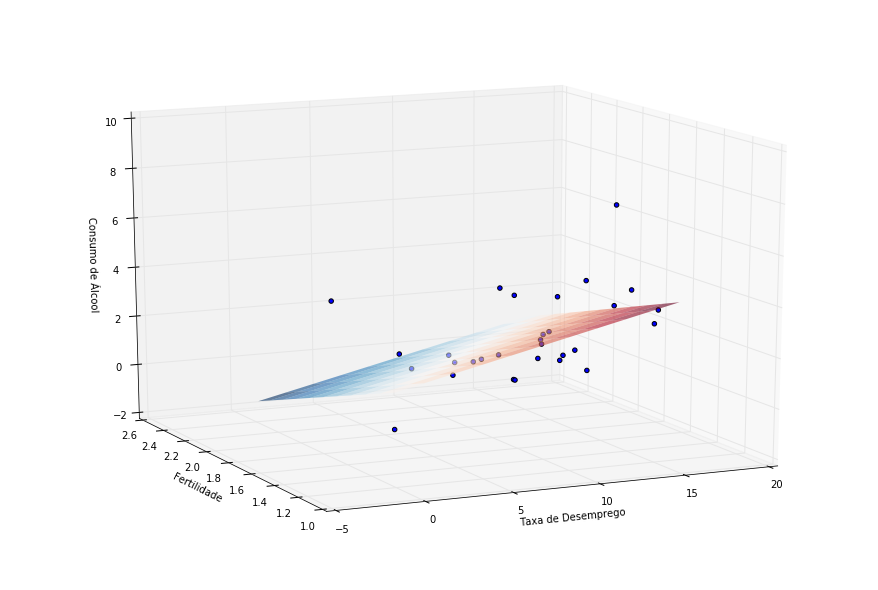

In [45]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['ConsumoDeAlcool', 'FertilidadeTotal']]
y = dados['TaxadeDesemprego']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.ConsumoDeAlcool.min(), X.ConsumoDeAlcool.max(), 100), 
                       np.linspace(X.FertilidadeTotal.min(), X.FertilidadeTotal.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].ConsumoDeAlcool, X[resid >= 0].FertilidadeTotal, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].ConsumoDeAlcool, X[resid < 0].FertilidadeTotal, y[resid < 0], color='black', alpha=1.0)

ax.set_zlabel('Consumo de Álcool')
ax.set_ylabel('Fertilidade')
ax.set_xlabel('Taxa de Desemprego')

Agora, após o mapeamento dos pontos das três variáveis, realizaremos uma Regressão Linear Múltipla.

## Regressão Linear Múltipla

In [46]:
y=dados.TaxadeDesemprego
X=dados.iloc[:,(2,4)]
X=sm1.add_constant(X)  
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TaxadeDesemprego   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.840
Date:                Tue, 06 Dec 2016   Prob (F-statistic):            0.00395
Time:                        17:55:24   Log-Likelihood:                -53.664
No. Observations:                  30   AIC:                             113.3
Df Residuals:                      27   BIC:                             117.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                4.3024      1.939      2.218      0.035         0.323     8.282
FertilidadeTotal    -2.3731      0.885     -2.681      0.012        -4.189    -0.557
ConsumoDeAlcool      0.1554      0.084      1.857      0.074        -0.016     0.327
==============================================================================
Omnibus:                       13.882   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.726
Skew:                           1.443   Prob(JB):                      0.00105
Kurtosis:                       4.628   Cond. No.                         87.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Teste de hipóteses:
H0: B1 = 0 (não há relação entre as variáveis)
H1: B1 =! 0 (há relação entre as variáveis)

Temos que o coeficiente angular da regressão múltipla é diferente de zero em ambos os casos. Dessa forma, rejeitamos H0, e portanto, há uma relação entre as variáveis.

O valor de determinação R quadrado obtido representa o índice de variações que podem ser representadas pelo modelo proposto. Como a correlação entre as variáveis explicativas com a variável resposta estão entre 0.4 e 0.5, este é um valor esperado (R quadrado vale 0.336, ou 33,6%). Podemos perceber que o coeficiente da Fertilidade Total é negativo (-2.3731), dessa forma quanto maior a Taxa de Fertilidade, menor será a Taxa de Desemprego. Já o coeficiente de Consumo de Álcool, temos que é positivo (0.1554), e portanto, quanto maior o Consumo de Álcool, maior a Taxa de Desemprego.
O coeficiente angular representa como a variável resposta varia conforme o aumento na variável explicativa.

## Regressão Linear Múltipla em Subgrupos

A fim de testar melhor o comportamento da Regressão Linear Múltipla, separaremos os dados em dois Subgrupos. Assim, será possível avaliar se o modelo global é semelhante ao efeito local.

Consideraremos então em relação ao consumo de álcool, sendo os grupos analisados:

Países com menos de 12 litros consumidos;

Países com ou mais de 12 litros consumidos.

In [47]:
sep1 = 12

Grupo 1, com consumo menor de 12 litros

In [48]:
G1 = pd.DataFrame()
G1['Fertilidade']=dados[dados.ConsumoDeAlcool < sep1].FertilidadeTotal
G1['Desemprego']=dados[dados.ConsumoDeAlcool < sep1].TaxadeDesemprego
G1['Alcool']=dados[dados.ConsumoDeAlcool < sep1].ConsumoDeAlcool

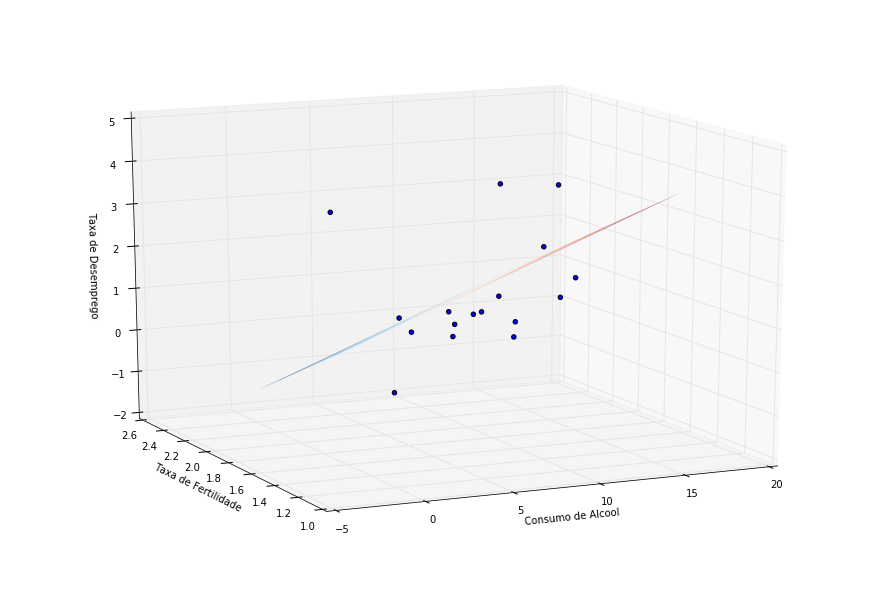

In [49]:
#rom mpl_toolkits.mplot3d import Axes3D

X = dados[['ConsumoDeAlcool', 'FertilidadeTotal']]
y = dados['TaxadeDesemprego']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.ConsumoDeAlcool.min(), X.ConsumoDeAlcool.max(), 100), 
                       np.linspace(X.FertilidadeTotal.min(), X.FertilidadeTotal.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(G1.Alcool, G1.Fertilidade, G1.Desemprego, color='black', alpha=1.0, facecolor='blue')

ax.set_zlabel('Taxa de Desemprego')
ax.set_ylabel('Taxa de Fertilidade')
ax.set_xlabel('Consumo de Alcool')

Grupo 2, com consumo maior ou igual a 12 litros

In [50]:
G2 = pd.DataFrame()
G2['Fertilidade']=dados[dados.ConsumoDeAlcool >= sep1].FertilidadeTotal
G2['Desemprego']=dados[dados.ConsumoDeAlcool >= sep1].TaxadeDesemprego
G2['Alcool']=dados[dados.ConsumoDeAlcool >= sep1].ConsumoDeAlcool

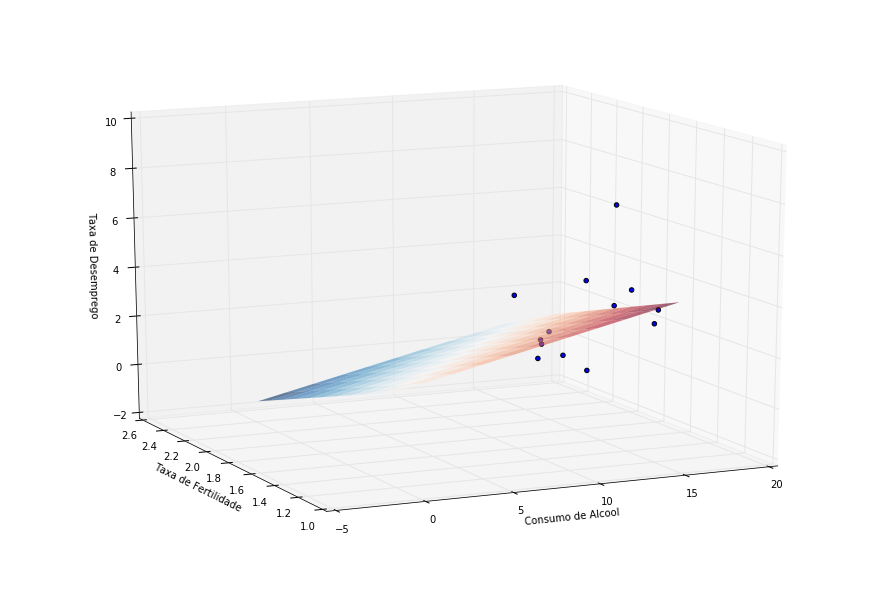

In [51]:
#rom mpl_toolkits.mplot3d import Axes3D

X = dados[['ConsumoDeAlcool', 'FertilidadeTotal']]
y = dados['TaxadeDesemprego']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.ConsumoDeAlcool.min(), X.ConsumoDeAlcool.max(), 100), 
                       np.linspace(X.FertilidadeTotal.min(), X.FertilidadeTotal.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(G2.Alcool, G2.Fertilidade, G2.Desemprego, color='black', alpha=1.0, facecolor='blue')

ax.set_zlabel('Taxa de Desemprego')
ax.set_ylabel('Taxa de Fertilidade')
ax.set_xlabel('Consumo de Alcool')

A partir dos gráficos 3D plotados, antes e depois dos subgrupos, podemos concluir que o modelo representa bem os valores de consumo de álcool maiores ou igual a 12 litros. No entanto, representa de forma mais imperfeita os países com consumo menor de 12 litros. Essa conclusão se dá devido á semelhança do gráfico do segundo subgrupo com o gráfico geral, e a diferença do primeiro subgrupo com o gráfico geral.

## Resposta do problema / Conclusão Final

Das variáveis escolhidas inicialmente (IDH, Taxa de Fertilidade, Taxa de Investimento e Consumo de Álcool), a Taxa de Fertilidade e o Consumo de Álcool foram as escolhidas. Essa escolha se deu a partir do cálculo de correlação de cada variável explicativa com a variável resposta, obtendo os valores -0.5 para Fertilidade e 0.399 para Consumo de Álcool.
A partir dessas variáveis escolhidas, realizamos uma Regressão Linear Múltipla, a fim de assemelhar os dados à uma reta, conhecendo seu coeficiente angular. A partir desse valor, podemos perceber que a variação da Taxa de Desemprego se dá maior e negativamente para maiores valores de Fertilidade, e menor e positivamente para maiores valores de Consumo de Álcool. Finalmente, separamos os dados em dois subgrupos a fim de testar a qualidade da regressão realizada localmente, para consumos de àlcool menor que 12 litros ou maior e igual à esse valor. Com isso, foi possivel perceber que a maior imprecisão do nosso modelo se dá para valores de consumo menores à 12 litros, e a maior precisão para valores maiores ou igual a 12 litros.